In [1]:
import pandas as pd
pd.set_option("display.max.columns", None)

import geopandas as gpd

import matplotlib.pyplot as plt
import shapely as shply
print(gpd.__version__)  # note this is a pretty old version

0.3.0


In [9]:
gdf = gpd.read_file('hffi_data_20122018_geocoded.csv')
print(len(gdf))
gdf.head()
#gdf.columns

602


,field_1,year,org_id,loan_amt,entity_structure,total_proj_cost,food_desert,food_desert_2,hffi_year,proj_desc,bus_type,activity,activity_other,latitude,longitude,street,address_2,city,state,zipcode,zipcode_4,fips,address,location,point,lat,long,alt,geometry
0,0,2018,448,2892723.0,,14500000.0,OTHER,The Food Trust,2014.0,Acquisition and predevelopment of vacant site ...,RETAIL,GROCERYSTORE,,42.086000000000006,-71.024,,,,,,,,"139 Pleasant St, Brockton, MA, 02301","139, Pleasant Street, Montello, Brockton, Plym...","(42.086082909090905, -71.0239490909091, 0.0)",42.086082909090905,-71.0239490909091,0.0,None
1,1,2018,448,3300000.0,,6050000.0,OTHER,The Food Trust,2013.0,Acquisition and predevelopment of vacant site ...,RETAIL,GROCERYSTORE,,42.086000000000006,-71.024,,,,,,,,"139 Pleasant St, Brockton, MA, 02301","139, Pleasant Street, Montello, Brockton, Plym...","(42.086082909090905, -71.0239490909091, 0.0)",42.086082909090905,-71.0239490909091,0.0,None
2,2,2018,448,3000000.0,,22400000.0,ERS,,2016.0,Renovated building houses Fresh Grocer brand g...,RETAIL,GROCERYSTORE,,40.003,-75.215,,,,,,,,"4105 Monument Rd, Philadelphia, PA, 19131","4105, Monument Road, Pencoyd, Philadelphia, Ph...","(40.00174615151515, -75.21529207575757, 0.0)",40.00174615151515,-75.21529207575757,0.0,None
3,3,2018,448,750000.0,,750000.0,OTHER,The Food Trust,2014.0,Acquisition and build-out of commercial traini...,NONRETAIL,PRODUCTION,,42.332,-71.082,,,,,,,,"2117 Washington St, Boston, MA, 02119","2117, Washington Street, Roxbury Crossing, Sou...","(42.33191704347826, -71.08190847826087, 0.0)",42.33191704347826,-71.08190847826087,0.0,None
4,4,2018,502,54000.0,FORPROFIT,81000.0,OTHER,CIMS/ERS (<120% adj.,2017.0,Grocery Store,RETAIL,GROCERYSTORE,,40.03579771,-76.31409186,252 S 4th St,,Reading,PA,19602.0,,42011002500.0,"252 S 4th St,Reading,PA,19602","252, South 4th Street, Reading, Berks County, ...","(40.33143120408163, -75.93009128571428, 0.0)",40.33143120408163,-75.93009128571428,0.0,None


In [13]:
print('\nSo our "geometry" column is a ', type(gdf.geometry))
print('\nInside that column, we have many ', type(gdf.geometry[0]))


So our "geometry" column is a  <class 'geopandas.geoseries.GeoSeries'>

Inside that column, we have many  <class 'shapely.geometry.point.Point'>


In [14]:
print('\nSo our "geometry" column is a ', type(gdf.lat))
print('\nInside that column, we have many ', type(gdf.lat[0]))


So our "geometry" column is a  <class 'pandas.core.series.Series'>

Inside that column, we have many  <class 'str'>


In [15]:
gdf['float_lat'] = pd.to_numeric(gdf['lat'], downcast='float')
gdf['float_long'] = pd.to_numeric(gdf['long'], downcast='float')

#Some fancy looping to populate our 'geometry' column
gdf['geometry'] = [shply.geometry.point.Point(xy) for xy in zip(gdf['float_long'], gdf['float_lat'])]

# Coordinate reference system : WGS84
gdf.crs = {'init': 'epsg:4269'}

print('\nSo now our "geometry" column is still a ', type(gdf.geometry))
print('\n.....But inside that column, we have many ', type(gdf.geometry[0]))




So now our "geometry" column is still a  <class 'geopandas.geoseries.GeoSeries'>

.....But inside that column, we have many  <class 'shapely.geometry.point.Point'>


In [16]:
gdf.head()

,field_1,year,org_id,loan_amt,entity_structure,total_proj_cost,food_desert,food_desert_2,hffi_year,proj_desc,bus_type,activity,activity_other,latitude,longitude,street,address_2,city,state,zipcode,zipcode_4,fips,address,location,point,lat,long,alt,geometry,float_lat,float_long
0,0,2018,448,2892723.0,,14500000.0,OTHER,The Food Trust,2014.0,Acquisition and predevelopment of vacant site ...,RETAIL,GROCERYSTORE,,42.086000000000006,-71.024,,,,,,,,"139 Pleasant St, Brockton, MA, 02301","139, Pleasant Street, Montello, Brockton, Plym...","(42.086082909090905, -71.0239490909091, 0.0)",42.086082909090905,-71.0239490909091,0.0,POINT (-71.02394866943359 42.08608245849609),42.086082,-71.023949
1,1,2018,448,3300000.0,,6050000.0,OTHER,The Food Trust,2013.0,Acquisition and predevelopment of vacant site ...,RETAIL,GROCERYSTORE,,42.086000000000006,-71.024,,,,,,,,"139 Pleasant St, Brockton, MA, 02301","139, Pleasant Street, Montello, Brockton, Plym...","(42.086082909090905, -71.0239490909091, 0.0)",42.086082909090905,-71.0239490909091,0.0,POINT (-71.02394866943359 42.08608245849609),42.086082,-71.023949
2,2,2018,448,3000000.0,,22400000.0,ERS,,2016.0,Renovated building houses Fresh Grocer brand g...,RETAIL,GROCERYSTORE,,40.003,-75.215,,,,,,,,"4105 Monument Rd, Philadelphia, PA, 19131","4105, Monument Road, Pencoyd, Philadelphia, Ph...","(40.00174615151515, -75.21529207575757, 0.0)",40.00174615151515,-75.21529207575757,0.0,POINT (-75.21529388427734 40.00174713134766),40.001747,-75.215294
3,3,2018,448,750000.0,,750000.0,OTHER,The Food Trust,2014.0,Acquisition and build-out of commercial traini...,NONRETAIL,PRODUCTION,,42.332,-71.082,,,,,,,,"2117 Washington St, Boston, MA, 02119","2117, Washington Street, Roxbury Crossing, Sou...","(42.33191704347826, -71.08190847826087, 0.0)",42.33191704347826,-71.08190847826087,0.0,POINT (-71.0819091796875 42.33191680908203),42.331917,-71.081909
4,4,2018,502,54000.0,FORPROFIT,81000.0,OTHER,CIMS/ERS (<120% adj.,2017.0,Grocery Store,RETAIL,GROCERYSTORE,,40.03579771,-76.31409186,252 S 4th St,,Reading,PA,19602.0,,42011002500.0,"252 S 4th St,Reading,PA,19602","252, South 4th Street, Reading, Berks County, ...","(40.33143120408163, -75.93009128571428, 0.0)",40.33143120408163,-75.93009128571428,0.0,POINT (-75.93009185791016 40.3314323425293),40.331432,-75.930092


In [17]:
%%capture
!pip install geoplot;

You are using pip version 9.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [18]:
import geoplot
outlines = gpd.read_file('zip://cb_2016_us_state_500k.zip')
outlines.head()

#for now, lets take only look at the contiguous US
contiguous = outlines.loc[~outlines['STUSPS'].isin(['AK','FM','MH','MP','PR','PW','AS','HI','GU','UM','VI'])]
outlines.STUSPS

#len(contiguous) #we have 50 states now
print(contiguous.crs)
print(gdf.crs)

{'init': 'epsg:4269'}
{'init': 'epsg:4269'}


In [19]:
len(contiguous)
#we should have 48 states -- + DC

49

In [20]:
contiguous.NAME

0                  Alabama
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
9                  Georgia
11                   Idaho
12                Illinois
13                 Indiana
14                    Iowa
15                  Kansas
16                Maryland
17               Minnesota
18             Mississippi
19                 Montana
20                  Nevada
21              New Jersey
22              New Mexico
23            North Dakota
24                Oklahoma
25            Pennsylvania
26          South Carolina
27            South Dakota
28                    Utah
29                 Vermont
30           West Virginia
31                 Wyoming
34                 Florida
35                Kentucky
36               Louisiana
37                   Maine
38           Massachusetts
39                Michigan
40                Missouri
4

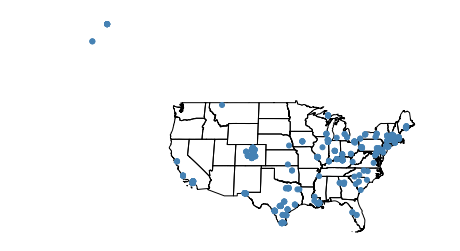

In [21]:
type(outlines)
outlines.geometry

# A polyplot shows simple shapes. The default settings are pretty nice looking.

ax = geoplot.polyplot(contiguous, projection=geoplot.crs.Robinson())
#ax = geoplot.webmap(contiguous, projection=geoplot.crs.WebMercator())


#Overlay the points
geoplot.pointplot(gdf,
                  ax = ax)  # add it to the axes created above

plt.show()

In [22]:
gdf = gdf.loc[gdf['state']!="AK"]

Basic map achieved, adding some basic elements

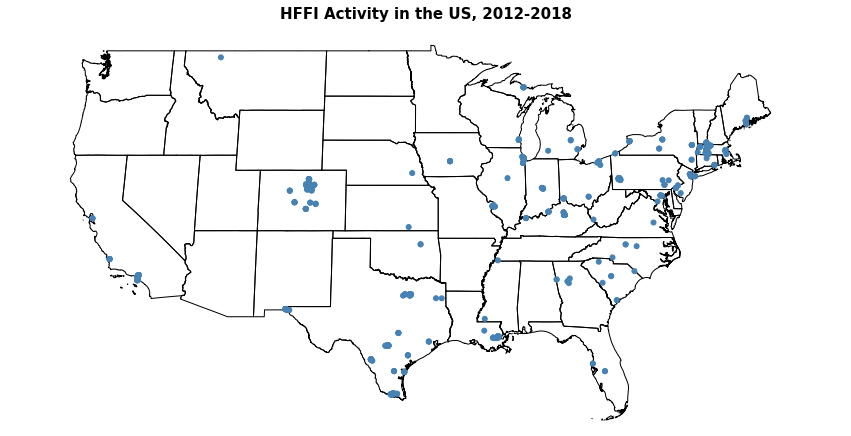

In [23]:
type(outlines)
outlines.geometry

# A polyplot shows simple shapes. The default settings are pretty nice looking.

ax = geoplot.polyplot(contiguous, projection=geoplot.crs.Robinson(), figsize=(15,15))

#Overlay the points
geoplot.pointplot(gdf,
                  ax = ax)  # add it to the axes created above

plt.title('HFFI Activity in the US, 2012-2018', fontsize=15,fontweight='bold')

plt.show()

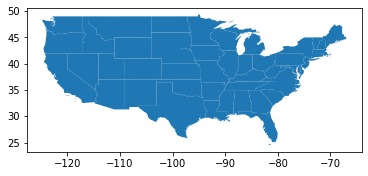

In [24]:
contiguous.plot()

In [25]:
import mapclassify as mc

# Trying to get a map with projects by type of activity

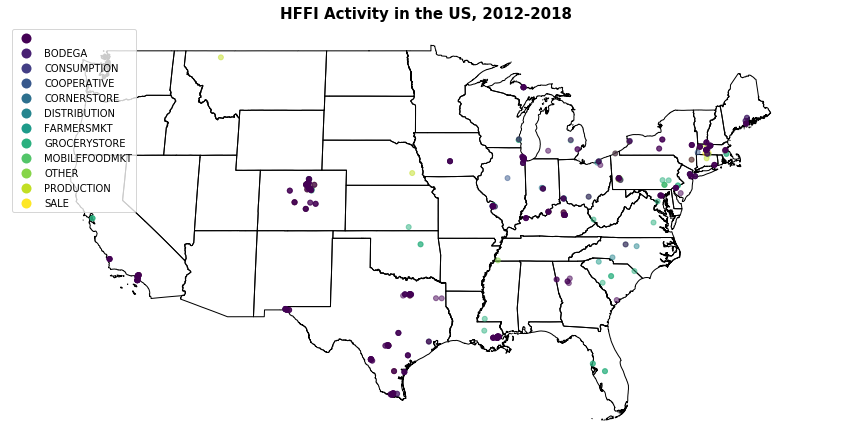

In [26]:
type(outlines)
outlines.geometry

# A polyplot shows simple shapes. The default settings are pretty nice looking.

ax = geoplot.polyplot(contiguous, projection=geoplot.crs.Robinson(), figsize=(15,15))
#ax = geoplot.webmap(contiguous, projection=geoplot.crs.WebMercator())

geoplot.pointplot(gdf,
                  ax = ax, hue='activity', alpha=0.5, legend=True) 

## Trying real darn hard to get the color scheme to be categorical. Tried couple different ways to no avail. 
## in an ideal world would also change the background map to be more neutral; grey filling and white boundaries
## maybe for example.

plt.title('HFFI Activity in the US, 2012-2018', fontsize=15,fontweight='bold')

plt.show()

HFFI Projects by dollar amount

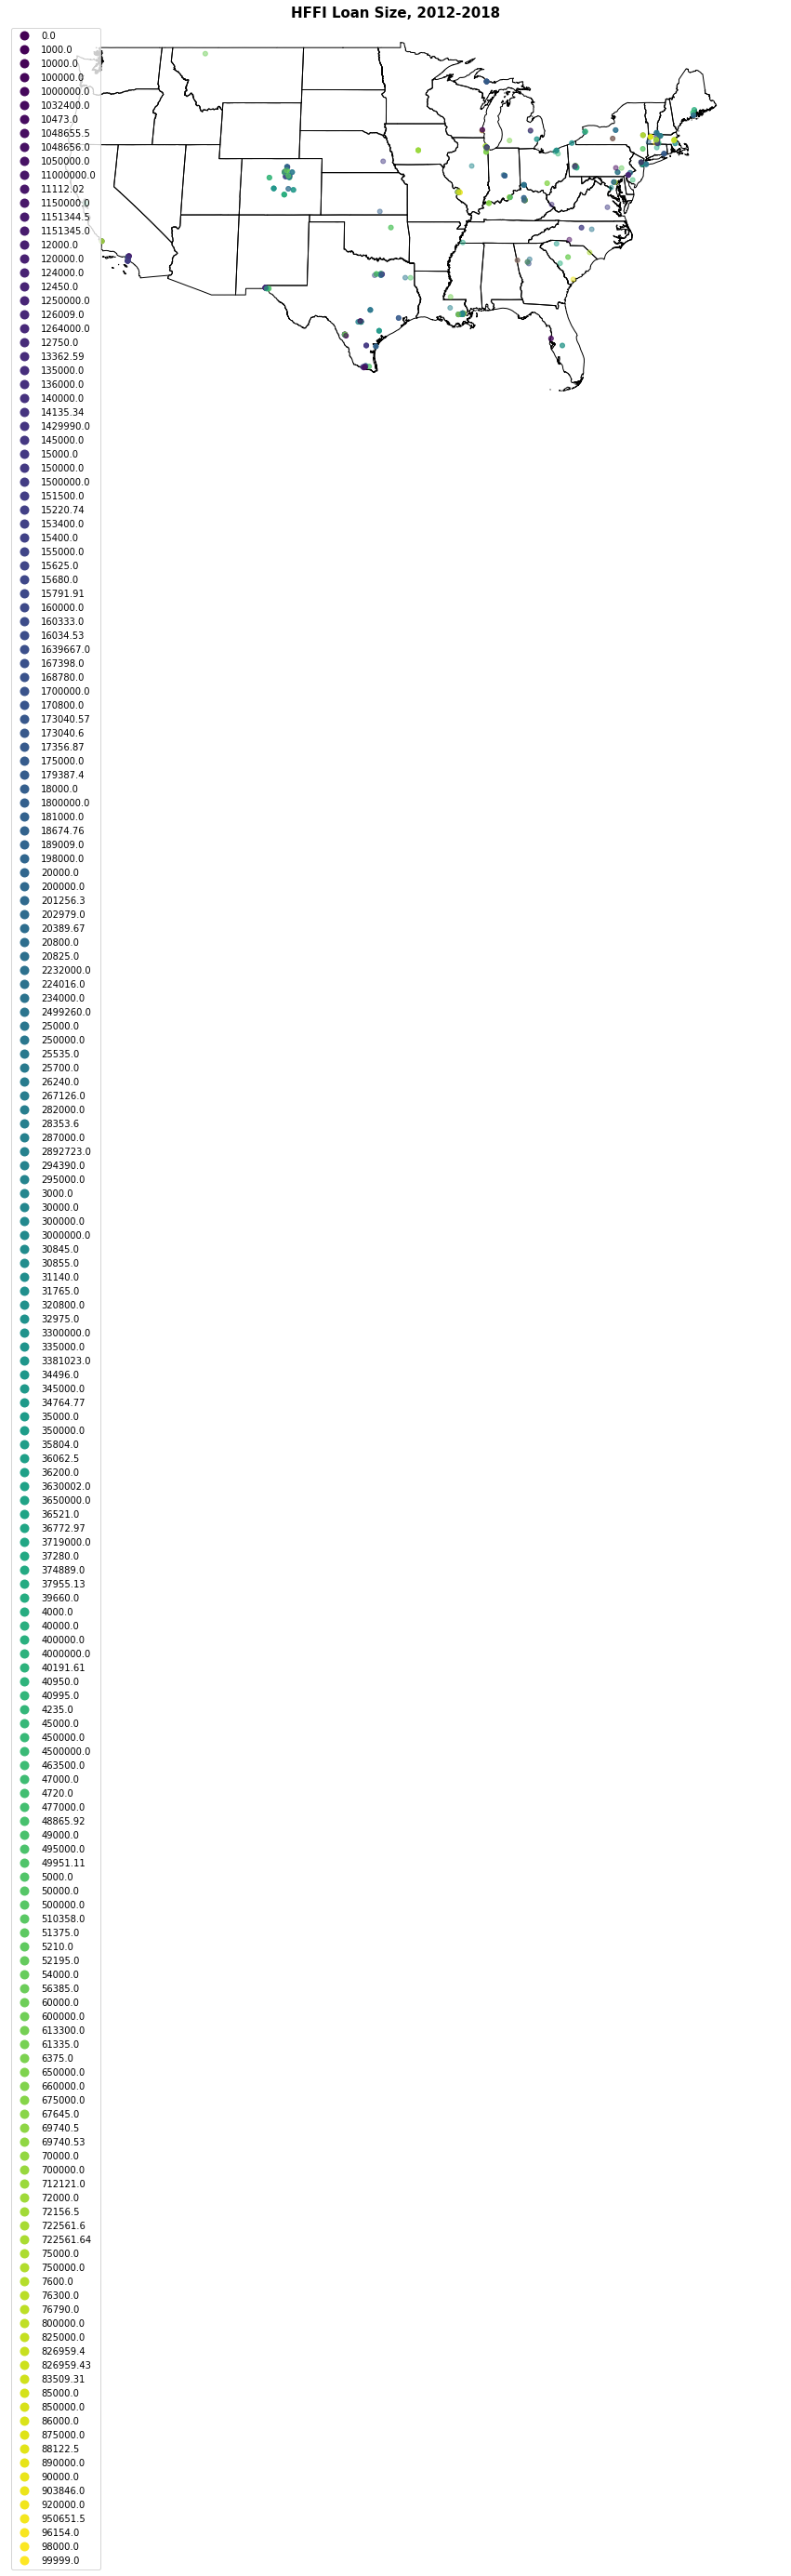

In [27]:
type(outlines)
outlines.geometry

# A polyplot shows simple shapes. The default settings are pretty nice looking.

ax = geoplot.polyplot(contiguous, projection=geoplot.crs.Robinson(), figsize=(15,15))

geoplot.pointplot(gdf,
                  ax = ax, hue='loan_amt', alpha=0.5, legend=True) 


plt.title('HFFI Loan Size, 2012-2018', fontsize=15,fontweight='bold')

plt.show()

In [28]:
#ok, need to create a column with categories

import numpy as np

In [33]:
gdf['loan_amt_float'] = gdf['loan_amt'].astype('float')

In [35]:
#gdf.head()

#obDF.duplicated(['TractFIPS'], keep='first')])

#Save some values out to CSV!
gdf.groupby('state')['state'].value_counts().to_csv('allProj.csv', index=True)


#Make a dataframe with only unique projects (assuming loans going to same lat/long are part of same project)
duplicateSeries = gdf.duplicated(['lat','long'], keep='first')
gdf['isDuplicate'] = duplicateSeries

uniqueProjDF = gdf.loc[gdf.isDuplicate == False].copy()

#uniqueProjDF.groupby('state')['state'].value_counts().to_csv('out.txt', index=True)
uniqueProjDF.groupby('state')['state'].value_counts()

state  state
                 3
CA     CA       15
CO     CO       28
CT     CT        2
DC     DC        1
FL     FL        2
GA     GA        4
IA     IA        1
IL     IL       10
IN     IN        3
KS     KS        1
KY     KY        9
LA     LA       12
MA     MA       14
MD     MD        2
ME     ME        3
MI     MI        5
MO     MO        6
MS     MS        1
MT     MT        1
NC     NC        3
NE     NE        1
NJ     NJ        2
NY     NY        8
OH     OH        7
OK     OK        1
PA     PA       20
SC     SC        6
TN     TN        1
TX     TX       34
VA     VA        1
VT     VT        1
WI     WI        2
WV     WV        1
Name: state, dtype: int64

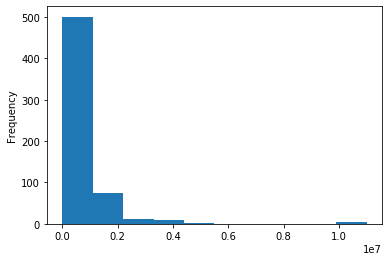

In [62]:
#TODO make loan_amount buckets that make sense

gdf['loan_amt_float'].plot.hist()

Goal is to create 5 categories: 
- $0 to $250,000 loans
- $250,000 to $500,000 loans
- $500,000 to $1M
- $1m t0 $2M
- Above $2M